# plot a ugrid mesh

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import netCDF4
import cartopy.crs as ccrs
from cartopy.io.img_tiles import MapQuestOpenAerial

In [3]:
url = 'http://www.smast.umassd.edu:8080/thredds/dodsC/fvcom/mwra/fvcom'

In [4]:
ncv = netCDF4.Dataset(url).variables
lon = ncv['lon'][:]
lat = ncv['lat'][:]
nv = ncv['nv'][:].T - 1
triang = tri.Triangulation(lon,lat,triangles=nv)

/home/usgs/miniconda/envs/ioos/lib/python2.7/site-packages/numpy/lib/shape_base.py:431: FutureWarning: in the future np.array_split will retain the shape of arrays with a zero size, instead of replacing them by `array([])`, which always has a shape of (0,).
  FutureWarning)
/home/usgs/miniconda/envs/ioos/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


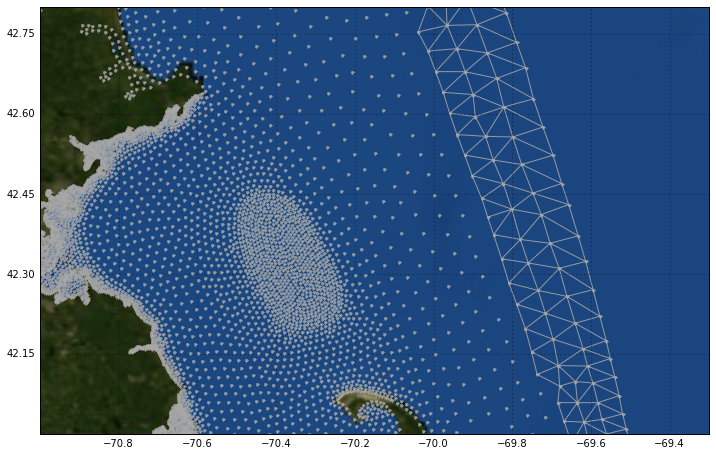

In [5]:
geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))

fig = plt.figure(figsize=(12,8))
tiler = MapQuestOpenAerial()
ax = plt.axes(projection=tiler.crs)

bbox=[-71, -69.3, 42, 42.8]
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(bbox)
ax.add_image(tiler, 8)

#ax.coastlines()
kw = dict(marker='.', linestyle='-', alpha=0.85, color='darkgray', transform=geodetic)
ax.triplot(triang, **kw)  # or lon, lat, triangules
#ax.set_extent()
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
